In [1]:
#### This notebook is dedicated to determining which users are pain patients


### ToDo

* Isolate people who have only texted about migraine vs. crps (etc). Look for systematic differences
* Do analysis on all words in texts
* Try doing the analysis on twitter users rather than tweets
* Combine terms like 'fibro' and 'fibromyalgia'
* Store lists of things to ignore/combine/categorize etc in spreadsheet and import?

### Notes
SQL query for counting tweets in which hashtag used:
SELECT h.hashtag, count(t.tweetID) AS totTweets FROM hashtags h INNER JOIN tweetsXtags t ON h.tagID = t.tagID GROUP BY hashtag ORDER BY totTweets DESC ;

#### This cell was imported from twitter_data_analysis 11/9/16
That was not the last time this notebook was updated 

In [1]:
%pylab inline
%cd twitteranalysis
#standard lib
import os
import string

#other people's property
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
import pandas as pd
from pandas import DataFrame, Series

import DataTools.Cursors


import sqlalchemy
sqlalchemy.__version__


# Create tables in database
from DataTools.TweetORM import create_db_tables
# create_db_tables()

#%cd /Users/adam/Dropbox/PainNarrativesLab/TwitterDataAnalysis
#%bookmark twitteranalysis
%cd twitteranalysis
%run -i environment.py
%run -i ConstantsAndUtilities.py
%run -i TestingTools/DataAndFunctionsForTesting.py
%run -i "DataTools/DataStructures.py"
%run -i "DataTools/DataConnections.py"
%run -i "DataTools/WordORM.py"
%run -i "DataTools/DataRepositories.py" 

# Initialize the tools for filtering and modifying the individual tweet words
from TextProcessors.Filters import *
from TextProcessors.Modifiers import *
%cd texttools
%run -i TextProcessors/Processors
%run -i TextProcessors/Tokenizers
%cd twitteranalysis
%run -i ConstantsAndUtilities.py


%run -i ProcessingTools/ProcessingControllers.py
%run -i ProcessingTools/Listeners.py
%run -i ProcessingTools/Workers.py
import DataTools.Cursors

Populating the interactive namespace from numpy and matplotlib
(bookmark:twitteranalysis) -> /Users/adam/Dropbox/PainNarrativesLab/TwitterDataAnalysis
/Users/adam/Dropbox/PainNarrativesLab/TwitterDataAnalysis


(bookmark:twitteranalysis) -> /Users/adam/Dropbox/PainNarrativesLab/TwitterDataAnalysis
/Users/adam/Dropbox/PainNarrativesLab/TwitterDataAnalysis
creating connection: mysql twitter_wordsTEST 
(bookmark:texttools) -> /Users/adam/Dropbox/PainNarrativesLab/TextTools
/Users/adam/Dropbox/PainNarrativesLab/TextTools
(bookmark:twitteranalysis) -> /Users/adam/Dropbox/PainNarrativesLab/TwitterDataAnalysis
/Users/adam/Dropbox/PainNarrativesLab/TwitterDataAnalysis
creating connection: mysql twitter_wordsTEST 


In [3]:
%cd twitteranalysis
%run -i DataTools/Cursors
u = UserCursor(language='en')

(bookmark:twitteranalysis) -> /Users/adam/Dropbox/PainNarrativesLab/TwitterDataAnalysis
/Users/adam/Dropbox/PainNarrativesLab/TwitterDataAnalysis


In [4]:
print(u.language)

en


In [5]:
experimentalTerms = ['fibromyalgia', 'lupus']

In [6]:
usersWithTermInProfile =[]

In [ ]:

wordTokenizer = WordTokenizer()
word_processor = SingleWordProcessor()


word_processor.add_to_filters( TextProcessors.Filters.UsernameFilter( ) )
word_processor.add_to_filters( TextProcessors.Filters.PunctuationFilter( ) )
word_processor.add_to_filters( TextProcessors.Filters.URLFilter( ) )
word_processor.add_to_filters( TextProcessors.Filters.NumeralFilter( ) )
word_processor.add_to_modifiers( TextProcessors.Modifiers.WierdBPrefixConverter() )
# processor.add_to_modifiers( TextProcessors.Modifiers.UnicodeConverter() )
word_processor.add_to_modifiers( TextProcessors.Modifiers.CaseConverter( ) )


# Create queue and listeners for processed tokens
Queue = SaveQueueHandler()
Queue.register_listener(SaveListener())

# Load cursor for tweet ids
cursor = DataTools.Cursors.TweetCursor()

StringProcessingWorker.initialize(cursor, Queue, word_processor)
threads = []

# for _ in range(1):
worker = StringProcessingWorker()
worker.do_it()



/Users/adam/.pyenv/versions/3.4.3/lib/python3.4/site-packages/sqlalchemy/dialects/mysql/base.py:1518: Warning: (1287, "'@@tx_isolation' is deprecated and will be removed in a future release. Please use '@@transaction_isolation' instead")
  cursor.execute('SELECT @@tx_isolation')


KeyboardInterrupt: 

In [32]:
profiles = []
for i in range(0, 10):
    user = u.next()
    words = wordTokenizer.process(user.description)
    num = len(words)
    words =[word_processor.process(w) for w in words ]
    words = [w for w in words if w is not None ]
    profiles.append((user.userID, num, len(words), words))
                    
print(profiles)

[(27226134, 31, 25, ['is', 'the', 'worst', 'she', 'enjoys', 'horse', 'rides', 'on', 'the', 'beach', 'coffee', 'and', 'zines', 'she', 'thinks', 'a', 'lot', 'about', 'lots', 'of', 'stuff', 'she', 'also', 'enjoys', 'tweetsaboutcats']), (27441979, 7, 5, ['why', 'are', 'you', 'following', 'me']), (27678466, 28, 17, ['news', 'sports', 'publicist', 'writer', 'progressive', 'animal', 'lover', 'badgers/packers', 'survived', 'seven', 'abdominal', 'surgeries', 'chronic', 'pain', 'advocate', '20yrs', 'w/fibromyalgia']), (28003242, 16, 9, ['walking', 'dead', 'true', 'blood', 'mom', 'coffee', 'twdfamily', 'thewalkingdead', 'twd']), (28396093, 6, 3, ['european', 'laywoman', 'human']), (28655441, 21, 16, ['physiotherapy', 'association', 'of', 'british', 'columbia', 'keeping', 'british', 'columbians', 'moving', 'for', 'life', 'like', 'us', 'on', 'facebook', 'http']), (29227624, 26, 21, ['area', 'sales', 'manager', 'for', 'supreme', 'products', 'ltd.', 'collector', 'of', 'shoes', 'horse', 'rider', 'love

[Errno 2] No such file or directory: 'textanalysis'
/Users/adam/Dropbox/PainNarrativesLab/TwitterDataAnalysis


NameError: name 'dao' is not defined

ImportError: No module named 'beautifulsoup4'

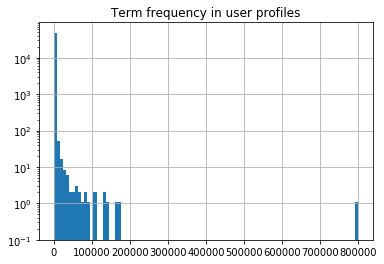

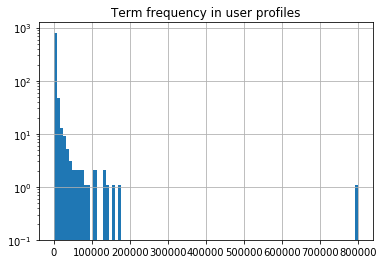

In [8]:
# This cell was imported from twitter_data_analysis 11/9/16 
%cd textanalysis
%run -i ProcessingTools/SearchTools.py

# \section{Word frequency}
freq = pd.read_excel("%s/freq_wordlist.xlsx" % DATAFOLDER)
len(freq)

fig, ax = plt.subplots()
freq.freq.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
ax.set_title("Term frequency in user profiles")

trimmed_freq = freq[freq.freq > 1000]
len(trimmed_freq)

fig, ax = plt.subplots()
trimmed_freq.freq.hist(ax=ax, bins=100, bottom=0.1)
ax.set_yscale('log')
ax.set_title("Term frequency in user profiles")

from beautifulsoup4.BeautifulSoup import BeautifulStoneSoup

def formatter(text):
    try:
        return unicode(BeautifulStoneSoup(text, convertEntities=BeautifulStoneSoup.ALL_ENTITIES))
    except:
        print ("Error %s" % text)
        return ''


trimmed_freq['word'] = trimmed_freq['word'].map(lambda x: formatter(x))

trimmed_freq.sort('freq', ascending=False)[:10]

fibro_aliases = ['Fibromyalgia', 'Fibro', 'fibro*']
for t in fibro_aliases:
    fibro = condition_searcher(t, fibro)

crps = Condition('crps')
crps_aliases = ['crps', 'RSD', 'c.r.p.s.', 'r.s.d.', 'complex regional pain syndrome', 'reflex sympathetic dystrophy']
for t in crps_aliases:
    crps = condition_searcher(t, crps)

import numpy
d = numpy.genfromtxt('/Users/adam/Desktop/freq_wordlist.txt')

import asciitable
h = DataFrame(asciitable.read('/Users/adam/Desktop/freq_wordlist.txt'))

dt = pd.read_table('/Users/adam/Desktop/freq_wordlist.csv', delim_whitespace=True, encoding='utf-8')

dt = dt.applymap(lambda x: x['word'].encode('ascii', 'replace'))

s = Searcher()
crps_results = s.search('((crps) | (RSD) | (r.s.d.) | (c.r.p.s.) | (complex regional pain syndrome) | (chronic regional pain syndrome) | (reflex sympathetic dystrophy))')
s = Searcher()
migraine_results = s.search('((migraine) | (Migraineur) | (migr*))')
s = Searcher()
fibro_results = s.search('((Fibromyalgia) | (Fibro) | (fibro*) | (fm) | (fms))')
s = Searcher()
spoonie_results = s.search('Spoonie')
s = Searcher()
vulvodynia_results = s.search('Vulvodynia | Vulvadynia')
s = Searcher()
endo_results = s.search('endometriosis | endo')
s = Searcher()
neuropathy_results = s.search('neuropathy')
s = Searcher()
arthritis_results = s.search('((arthritis) | (*arthritis) | (oa) | (ra))' )
s = Searcher()
neuralgia_results = s.search('(neuralgia) | (*neuralgia)')
s = Searcher()
shingles_results = s.search('((shingles) | (post-herpetic neuralgia) | (PHN))')
s = Searcher()
backpain_results = s.search('(back pain | backpain)')
s = Searcher()
headache = s.search('headache')

migraine_users = ug.get_from_list('migraine', migraine_results['userids'])
crps_users = ug.get_from_list('crps', crps_results['userids'])
fibro_users = ug.get_from_list('fibromyalgia', fibro_results['userids'])
spoonie_users = ug.get_from_list('spoonie', spoonie_results['userids'])
vulvodynia_users = ug.get_from_list('vulvodynia', vulvodynia_results['userids'])
endo_users = ug.get_from_list('endometriosis', endo_results['userids'])
neuropathy_users = ug.get_from_list('neuropathy', neuropathy_results['userids'])
arthritis_users = ug.get_from_list('arthritis', arthritis_results['userids'])
neuralgia_users = ug.get_from_list('neuralgia', neuralgia_results['userids'])
shingles_users = ug.get_from_list('shingles', shingles_results['userids'])
backpain_users = ug.get_from_list('backpain', backpain_results['userids'])

migraine_users.to_csv('%s/migraine.csv' % DATAFOLDER)
crps_users.to_csv('%s/crps.csv' % DATAFOLDER)
fibro_users.to_csv('%s/fibromyalgia.csv' % DATAFOLDER)
spoonie_users.to_csv('%s/spoonie.csv' % DATAFOLDER)
vulvodynia_users.to_csv('%s/vulvodynia.csv' % DATAFOLDER)
endo_users.to_csv('%s/endo.csv' % DATAFOLDER)
neuropathy_users.to_csv('%s/neuropathy.csv' % DATAFOLDER)
arthritis_users.to_csv('%s/arthritis.csv' % DATAFOLDER)
neuralgia_users.to_csv('%s/neuralgia.csv' % DATAFOLDER)
shingles_users.to_csv('%s/shingles.csv' % DATAFOLDER)
backpain_users.to_csv('%s/backpain.csv' % DATAFOLDER)

In [ ]:
j='jjj'
print("%s" % j)

In [ ]:
TextTools.TextFilters.remove_numerals("7")

In [ ]:
"""
Used to be in FILEFOLDER = '%s/Desktop/user_categories' % BASE
Moved into Data folder in pain narratives lab
"""
def file_getter(filefolder=FILEFOLDER):
    """
    Loads the the files in the folder    
    Args:
        filefolder: Folder path for where all the folders are stored
    
    Returns:
        Dataframe
    """
    datafiles = []
    sourceFolder = os.walk(filefolder)
    for f in sourceFolder:
        filelist = f[2]
        for fl in filelist:
            fl = str(fl)
            #if fl is not '.DS_Store':
            if fl[-5:] == '.xlsx':
                print (fl)
                loc = filefolder + '/' + str(fl)
                datafiles.append(loc)
    return datafiles


def cat_importer(filenames):
    """
    Import spreadsheets with categorizations of users, 
    combine them, and return the result
        
    Args:
        filenames: List of full path excel files
    
    Returns:
        Dataframe
    """
    frames = []
    for f in filenames:
        try:
            frames.append(pd.read_excel(f))
        except:
            print ("error with %s" % f)
    combined = pd.concat(frames)
    return combined

In [ ]:
files = file_getter()
compiled = cat_importer(files)
print (len(compiled))

In [ ]:
compiled.columns

In [ ]:
# Make frames with categorized users
compiled = compiled[compiled.relevant == 1]
patients = compiled[compiled.patient == 1]
clinicians = compiled[compiled.clinician == 1]

# Separate by condition
patients_by_condition = patients.groupby('term')
clinicians_by_condition = clinicians.groupby('term')

In [ ]:
for g, n in patients_by_condition:
    print(g, len(n)) 

In [ ]:
migraine_bag = []
m = patients_by_condition.get_group('migraine')
for i in m.profile:
    migraine_bag.append(word_tokenize(i))
#for p in m:
#    migraine_bag.append(word_tokenize(p.profile))
print(len(migraine_bag))

In [ ]:

bagmaker = TextTools.WordBagMaker()
bagmaker.add_to_ignorelist(ConstantsAndUtilities.Ignore.get_list())
bagmaker.add_to_ignorelist(list(string.punctuation))
bagmaker.add_to_ignorelist(nltk.corpus.stopwords.words('english'))
bagmaker.add_to_cleaners(TextTools.URLCleaner())
#bagmaker.add_to_cleaners(TextTools.NumeralCleaner())

In [ ]:
'3'.isalpha()

In [ ]:
nc = TextTools.NumeralCleaner()

In [ ]:
nc.clean('cat')

In [ ]:
m = patients_by_condition.get_group('migraine')
pw = [w for w in m.profile]

bagmaker.process(pw)
print(len(bagmaker.masterbag))

In [ ]:
bagmaker.masterbag

In [ ]:
wf = TextStats.WordFreq(bagmaker.masterbag)

In [ ]:
wf.topN(20)

In [ ]:
wf.plot(30)

In [ ]:
mb = tuple(migraine_bag)
mfd = nltk.FreqDist(mb)